In [1]:
import h5py
import numpy as np
import glob2
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd

sns.set(style="ticks")

/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# All params
Q_list = [0.15]
W_list = [0.15]
D_list = [0.6]
T_list = [0.00001, 0.0001, 0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0]
wb_list = [0.0]
decay_list = [18.0]

seed_list = list(np.arange(0, 25))

## Plot distance

In [3]:
plotting_mean = True

In [4]:
density = 140
filename = f"distance_data/wb=5/distance_data_n={density}.json"
savename = f"distance_data/wb=5/distance_data_n={density}"
savename2 = f"distance_data/wb=5/distance_vs_threshold_n={density}"
density, savename, savename2

('140',
 'distance_data/wb=5/distance_data_n=140',
 'distance_data/wb=5/distance_vs_threshold_n=140')

In [6]:
if plotting_mean:
    with open(filename) as f:
        distance_data = json.load(f)
else:
    with open(filename) as f:
        distance_data = json.load(f)

In [22]:
X = []
for key, val in distance_data["Q0.15_W0.15_D0.6_T0.00001_wb5.0_decay18.0"].items():
    X.append(val)
X = np.array(X)
X.shape

(25, 8000)

In [26]:
import pandas as pd
import seaborn as sns

In [24]:
df = pd.DataFrame(X)

In [25]:
palette = sns.color_palette("muted", 9)
sns.lineplot(x='Time', y='Distance', hue='Threshold', data=df, estimator=np.mean, palette=palette)
plt.legend(loc=(1.05,0.25))


,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
0,1.834711,1.829674,1.825643,1.820060,1.810398,1.802700,1.802004,1.801423,1.801601,1.803624,...,0.970012,0.977152,0.966050,0.978097,0.965791,0.978252,0.967227,0.982401,0.971485,0.977542
1,1.919214,1.912691,1.906983,1.897028,1.888609,1.882722,1.880480,1.880045,1.879780,1.879693,...,1.427817,1.434662,1.429100,1.434447,1.429973,1.434959,1.429414,1.437526,1.427558,1.437526
2,1.771671,1.770275,1.762973,1.753443,1.745527,1.743294,1.742740,1.742357,1.742996,1.741177,...,0.482325,0.489142,0.484839,0.489931,0.480968,0.490626,0.477139,0.491430,0.478804,0.487951
3,1.802929,1.797099,1.793004,1.785390,1.775229,1.768763,1.767039,1.764510,1.765344,1.768298,...,1.284820,1.277871,1.284582,1.279852,1.287260,1.277624,1.285314,1.278254,1.286636,1.280495
4,1.856775,1.852684,1.849051,1.838429,1.832122,1.826653,1.826038,1.826291,1.825505,1.828441,...,0.281982,0.293053,0.281982,0.294839,0.282696,0.291625,0.279839,0.292696,0.278768,0.291982
5,1.852521,1.849696,1.843215,1.835612,1.827454,1.823363,1.823358,1.822412,1.822003,1.817488,...,0.894601,0.888958,0.894713,0.889385,0.896262,0.891036,0.893770,0.890165,0.889929,0.892223
6,1.840150,1.841378,1.833549,1.823594,1.811797,1.808105,1.807731,1.807637,1.810639,1.815171,...,0.409684,0.408640,0.411087,0.410149,0.408697,0.412572,0.406442,0.412847,0.406056,0.410148
7,1.832285,1.828857,1.823451,1.816756,1.806384,1.802286,1.801240,1.799889,1.802940,1.805412,...,1.339439,1.337088,1.338390,1.338919,1.337326,1.340499,1.336290,1.340231,1.334957,1.337165
8,1.755878,1.753280,1.748007,1.741818,1.732627,1.729725,1.729938,1.728457,1.727295,1.726170,...,0.035119,0.043435,0.031878,0.044954,0.032194,0.044434,0.032038,0.042416,0.034216,0.041164
9,1.823219,1.816730,1.814909,1.808579,1.799315,1.793483,1.794480,1.793733,1.794644,1.798130,...,0.798422,0.807059,0.799043,0.805548,0.795722,0.806828,0.795820,0.807645,0.799628,0.808679


In [21]:
np.array(val).shape

(8000,)

In [18]:
len(distance_data["Q0.15_W0.15_D0.6_T0.00001_wb5.0_decay18.0"]["0"])

8000

#### Distance for all trials

In [1]:
plt.rcParams["font.family"] = "Arial"
fig, axes = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(8, 8))

colors = plt.cm.Green(np.linspace(0.2, 1, len(seed_list)))
# colors = plt.cm.tab20(np.linspace(0.2, 1, len(seed_list)))

axes = axes.flatten()
for data_i, (ax, data) in enumerate(zip(axes, distance_data)):
    for trial_i, trials in enumerate(distance_data[data]):
        trials_list = distance_data[data][trials]
        
        ax.plot(trials_list, label=f"{seed_list[trial_i]}",
               color=colors[trial_i], linewidth=0.5) 
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(f"T={T_list[data_i]}", fontsize=14)
        ax.xaxis.grid(b=True, color='k', alpha=0.2, linestyle='--', linewidth=1)
        ax.yaxis.grid(b=True, color=(0,0,0), alpha=0.2, linestyle='--', linewidth=1)
        ax.yaxis.zorder = -1
        plt.ylim(0, 3)
        plt.xlim(0, len(trials_list))
        plt.xticks(np.arange(0, len(trials_list)+1, 2000))

if plotting_mean:
    fig.suptitle(f"Mean worker distance from queen \n (Q={Q_list[0]}, W={W_list[0]}, D={D_list[0]}, wb={wb_list[0]}, decay={decay_list[0]}) \n Worker density={density}", fontsize=15)
else:
    fig.suptitle(f"Median worker distance from queen \n (Q={Q_list[0]}, W={W_list[0]}, D={D_list[0]}, wb={wb_list[0]}, decay={decay_list[0]})", fontsize=15)
fig.subplots_adjust(top=0.85)   

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
leg = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -0.5),
          fancybox=True, shadow=False, ncol=5, title="Seed/Trial")  
for line in leg.get_lines():
    line.set_linewidth(3)
    
# Add x and y labels for all
ax = fig.add_subplot(111, frameon=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Time', labelpad=25) 
ax.set_ylabel('Distance', labelpad=25)

fig.subplots_adjust(wspace=0.25, hspace=0.5)

# if plotting_mean:
#     plt.savefig(f"{savename}.pdf", bbox_inches='tight')
#     plt.savefig(f"{savename}.png", bbox_inches='tight')
# else:
#     plt.savefig(f"{savename}.pdf", bbox_inches='tight')
#     plt.savefig(f"{savename}.png", bbox_inches='tight')

NameError: name 'plt' is not defined

### Avg distance for sets of params

In [11]:
# Plot mean of distances for each set of params
means_dict = {}
for data_i, data in enumerate(distance_data):
    means = []
    for trial_i, trials in enumerate(distance_data[data]):
        means.append(distance_data[data][trials])
    means_array = np.mean(np.array(means), axis=0)

    means_dict[data] = means_array

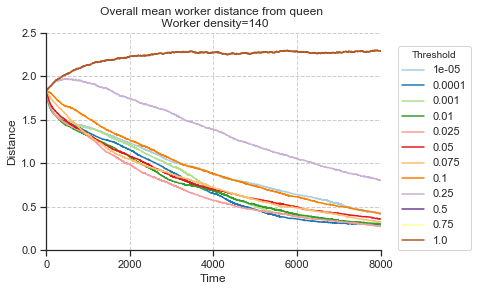

In [12]:
means_colors = plt.cm.Paired(np.linspace(0, 1, len(means_dict)))

for set_i, set_params in enumerate(means_dict):
    plt.plot(means_dict[set_params], label=f"{T_list[set_i]}", color=means_colors[set_i])

ax = plt.gca()
ax.xaxis.grid(b=True, color='k', alpha=0.2, linestyle='--', linewidth=1)
ax.yaxis.grid(b=True, color=(0,0,0), alpha=0.2, linestyle='--', linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(0, 2.5)
plt.xlim(0, len(trials_list))
plt.xticks(np.arange(0, len(trials_list)+1, 2000))
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend(loc=(1.05,0), title="Threshold")

if plotting_mean:
    plt.title(f'Overall mean worker distance from queen \n Worker density={density}')
    plt.savefig(f"{savename}_overall.pdf", bbox_inches='tight')
    plt.savefig(f"{savename}_overall.png", bbox_inches='tight')
else:
    plt.title('Mean of median distance from queen')
    plt.savefig(f"{savename}_overall.pdf", bbox_inches='tight')
    plt.savefig(f"{savename}_overall.png", bbox_inches='tight')

plt.show()


### Extract optimal T at various time points

In [13]:
short_means_dict = {}
timepoints = np.arange(-1, 8000, 1000, dtype=int)
for key_i, (key, val) in enumerate(means_dict.items()):
    distance_array = val[timepoints[1:]]
    distance_array = np.insert(distance_array, 0, val[0])
    short_means_dict[T_list[key_i]] = distance_array

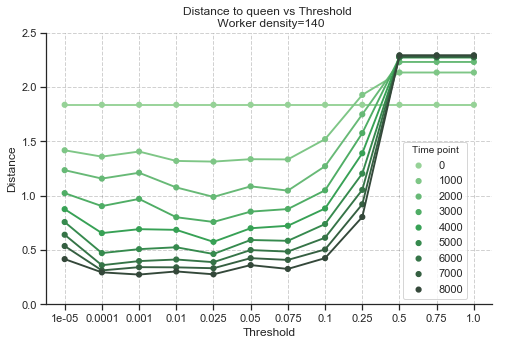

In [14]:
n_colors = len(timepoints)
colors = sns.set_palette(reversed(sns.color_palette("Greens_d", n_colors)), n_colors)

plt.figure(figsize=(8, 5))

df = pd.DataFrame.from_dict(short_means_dict, orient='index')
df.index.rename('Threshold', inplace=True)

stacked = df.stack().reset_index()
stacked.rename(columns={'level_1': 'Time point', 0: 'Distance'}, inplace=True)
stacked["Time point"] = stacked["Time point"] * 1000

sns.pointplot(data=stacked, x='Threshold', 
              y='Distance', hue='Time point', 
              join=True, palette=colors,
              linestyles="-", scale=0.7)
plt.ylim(0, 2.5)
plt.legend(loc=(0.8, 0.02), title="Time point")
plt.title(f"Distance to queen vs Threshold \n Worker density={density}")
ax = plt.gca()
ax.xaxis.grid(b=True, color='k', alpha=0.2, linestyle='--', linewidth=1)
ax.yaxis.grid(b=True, color='k', alpha=0.2, linestyle='--', linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(f"{savename2}.pdf", bbox_inches='tight')
plt.savefig(f"{savename2}.png", bbox_inches='tight')


### Line plot with standard deviation

In [27]:
T_list

[1e-05, 0.0001, 0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0]

#### Build Matrix

In [51]:
n_experiments = len(T_list)
n_timesteps = 8000
n_trials = 25
total_matrix = np.zeros((n_experiments, n_trials, n_timesteps))
total_matrix.shape

seeds_list = []
param_list = []

for data_i, (data_key, data_val) in enumerate(distance_data.items()):
    single_set = []
    
    for trial_i, (trial_key, trial_vals) in enumerate(data_val.items()):
        single_set.append(trial_vals)
        
        for val in trial_vals:
            seeds_list.append(trial_key)
            param_list_.append(data_key)

    single_set = np.array(single_set)
    total_matrix[data_i] = single_set

total_matrix.shape

(12, 25, 8000)

In [55]:
param_list_[:26]

['T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001',
 'T__0.00001']

#### Create DataFrame

In [30]:
step_size = 50
total_matrix = total_matrix[:,:,::step_size]
seeds_list = np.array(seeds_list[::step_size])
param_list = np.array(param_list_[::step_size])
n_timesteps = total_matrix.shape[2]
n_timesteps, total_matrix.shape

(160, (12, 25, 160))

In [31]:
distance_np = total_matrix.flatten()
distance_np.shape

(48000,)

In [32]:
distance_df = pd.DataFrame(data=distance_np, columns=['Distance'])
distance_df.head()

,Distance
0,1.834711
1,1.721678
2,1.647090
3,1.581098
4,1.545903


In [33]:
timesteps_np = np.tile(list(range(n_timesteps)), n_trials*n_experiments)
timesteps_np.shape

(48000,)

In [34]:
timesteps_df = pd.DataFrame(data=timesteps_np, columns=["Time"])
timesteps_df.head()

,Time
0,0
1,1
2,2
3,3
4,4


In [35]:
param_list_ = [f'T__{ele.split("_T")[-1].split("_wb")[0]}' for ele in param_list]

In [36]:
params_df = pd.DataFrame(data=param_list_, columns=['Threshold'])
params_df.head()

,Threshold
0,T__0.00001
1,T__0.00001
2,T__0.00001
3,T__0.00001
4,T__0.00001


In [37]:
df = pd.concat((distance_df, timesteps_df, params_df), axis=1)
df.head()

,Distance,Time,Threshold
0,1.834711,0,T__0.00001
1,1.721678,1,T__0.00001
2,1.647090,2,T__0.00001
3,1.581098,3,T__0.00001
4,1.545903,4,T__0.00001


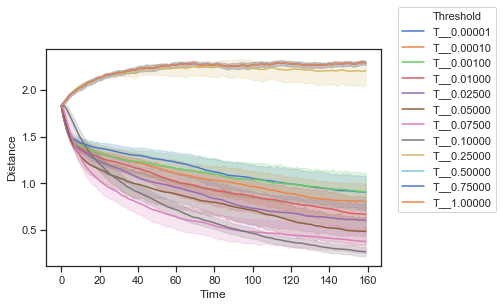

In [39]:
palette = sns.color_palette("muted", 12)
sns.lineplot(x='Time', y='Distance', hue='Threshold', data=df, estimator=np.mean, palette=palette)
plt.legend(loc=(1.05,0.25))


In [58]:
total_matrix.shape

(12, 25, 8000)

In [57]:
AUCs = total_matrix.sum(axis=2)
AUCs.shape

(12, 25)

In [65]:
np.expand_dims(np.array(T_list), axis=1)

array([[1.0e-05],
       [1.0e-04],
       [1.0e-03],
       [1.0e-02],
       [2.5e-02],
       [5.0e-02],
       [7.5e-02],
       [1.0e-01],
       [2.5e-01],
       [5.0e-01],
       [7.5e-01],
       [1.0e+00]])

In [47]:
AUCs_np = AUCs.flatten()
AUCs_np.shape

(300,)

In [48]:
AUCs_df = pd.DataFrame(data=AUCs_np, columns=['AUCs'])
AUCs_df.head()

,AUCs
0,196.994978
1,225.266691
2,148.374462
3,208.082298
4,146.345973


In [73]:
T_params_list = np.array(T_list).repeat(25)

In [75]:
params_df = pd.DataFrame(data=T_params_list, columns=['Threshold'])
params_df.head()

,Threshold
0,0.00001
1,0.00001
2,0.00001
3,0.00001
4,0.00001


In [86]:
bias_on_np = np.ones(T_params_list.shape[0])*5
bias_on_np.shape

(300,)

In [87]:
bias_df = pd.DataFrame(data=bias_on_np, columns=['Bias'])
bias_df.head()

,Bias
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0


In [88]:
df = pd.concat((AUCs_df, params_df, bias_df), axis=1)
df.head()

,AUCs,Threshold,Bias
0,196.994978,0.00001,5.0
1,225.266691,0.00001,5.0
2,148.374462,0.00001,5.0
3,208.082298,0.00001,5.0
4,146.345973,0.00001,5.0


#### Create Same but for no bias, then concat both dfs together

#### Plot

No handles with labels found to put in legend.


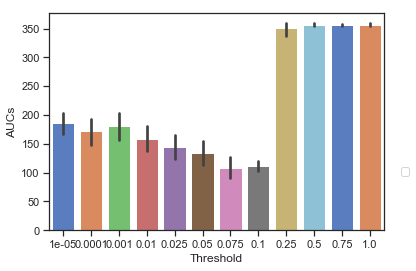

In [89]:
palette = sns.color_palette("muted", 12)
sns.barplot(x='Threshold', y='AUCs', data=df, estimator=np.mean, palette=palette)
plt.legend(loc=(1.05,0.25))